<a href="https://colab.research.google.com/github/Emanuel600/MNIST-Neural-Network/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from sklearn import preprocessing as prep

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

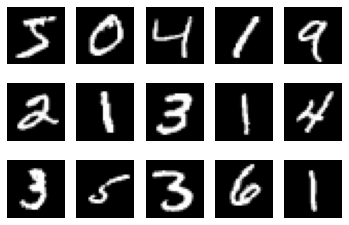

In [ ]:
(xt, yt), (xtt, ytt) = mnist.load_data()
xt = xt / 255.0
xtt = xtt / 255.0
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(xt[i], cmap = 'gray')
  plt.axis('off')

In [ ]:
xt = xt.reshape(xt.shape[0],xt.shape[1], xt.shape[2] , 1)
xtt = xtt.reshape(xtt.shape[0],xtt.shape[1], xtt.shape[2] , 1)

In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(input_shape= (28,28,1), activation = 'relu', filters=28, kernel_size=10, strides=2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(10)
])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 10, 10, 28)        2828      
_________________________________________________________________
flatten_30 (Flatten)         (None, 2800)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                28010     
Total params: 30,838
Trainable params: 30,838
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.fit(xt, yt, epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3717 - sparse_categorical_accuracy: 0.8946
Epoch 2/4
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0.9791
Epoch 3/4
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9856
Epoch 4/4
 946/1875 [==============>...............] - ETA: 6s - loss: 0.0380 - sparse_categorical_accuracy: 0.9880

In [ ]:
model.evaluate(xtt,ytt)